# Country Key Measures Heatmap

Create a heatmap for key statistics for a set of countries

The data is in a .csv (rows=countries; columns=measures)

The color scheme for each column of the heatmap is independant of the
other columns, since:
   the scale of each statistic is column-specific
   the choice of red or green for larger values is column-specific

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read the data from .csv into pandas DataFrame
df=pd.read_csv('Countries.csv', index_col=0)
df

Inflation  Short Rate  10yr Rate  10yr RealRate  Unemployment  \
Country                                                                  
US             2.0        2.47       2.37           0.37           3.6   
Canada         2.0        1.86       1.66          -0.34           5.7   
France         1.3       -0.31       0.29          -1.01           8.7   
Germany        2.0       -0.31      -0.12          -2.12           3.2   
Italy          1.1       -0.31       2.76           1.66          10.2   
Spain          1.5       -0.31       0.83          -0.67          14.7   
UK             2.1        0.82       1.05          -1.05           3.8   
Japan          0.9       -0.10      -0.06          -0.96           2.5   
China          2.5        4.35       3.34           0.84           3.7   

         GDP Growth  Debt to GDP  
Country                           
US              3.2        105.0  
Canada          1.6         10.6  
France          1.1         98.4  
Germany         0.7         60.9  
Italy           0.1        132.0  
Spain           2.4         97.1  
UK              1.8         84.7  
Japan           0.8        253.0  
China           6.4         47.6

In [13]:
# Set up for heat map
Cols=df.columns[:] # Can select columns, via slicing (also change cmaps below)
ncols = len(Cols)
# The heatmap color scheme depends on the column
# for example, inflation is shown in red, gdp growth in green
cmaps = ["RdYlGn_r", "RdYlGn", "RdYlGn", "RdYlGn", "RdYlGn_r", "RdYlGn","RdYlGn_r"]

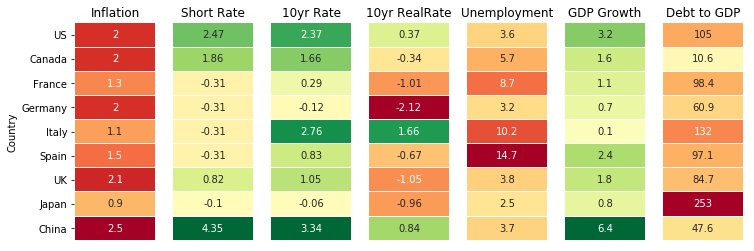

In [14]:
# Generate heat map with each column having its own color scale
fig,axes=plt.subplots(figsize = (12,4),ncols=ncols)
sns.heatmap(df[[Cols[0]]], linewidths=0.01, ax=axes[0], cmap=cmaps[0],
            center=0, annot=True, fmt='.10g', xticklabels=False, cbar=False)
axes[0].set_title(Cols[0])
for i in range(1,ncols):
    sns.heatmap(df[[Cols[i]]], linewidths=0.01, ax=axes[i], cmap=cmaps[i],
                center=0, annot=True, fmt='.10g', xticklabels=False,
                yticklabels=False, cbar=False)
    axes[i].set_title(Cols[i])
    axes[i].set_ylabel('')
plt.show()
plt.close()